
<center><img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg"></center>

## Imports



In [56]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

## Preprocessing

### Load dataset

In [57]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

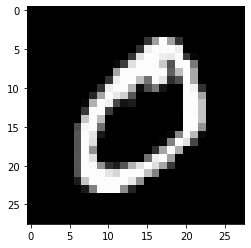

In [58]:
plt.imshow(X_train[1], cmap="gray")

### Data normalization

In [59]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Learning

### Building Autoencoder

In [61]:
X_input = tf.keras.layers.Input(shape=(28,28,1))
# encoder
X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(X_input)
encoded = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(X)
# latent space
# decoder
X = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(encoded)
X = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X)

encoded_input = tf.keras.layers.Input(shape=(7,7,8))
X = model.layers[-2](encoded_input)
X = model.layers[-1](X)

decoder = tf.keras.models.Model(inputs=encoded_input, outputs=X)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

decoder.summary()

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 7, 7, 8)]         0         
_________________________________________________________________
conv2d_transpose_50 (Conv2DT (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_51 (Conv2DT (None, 28, 28, 1)         145       
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


### Train

In [62]:
history = model.fit(X_train, X_train, batch_size=100, validation_split=0.1, epochs=30)

Epoch 1/30
540/540 [==============================] - 3s 5ms/step - loss: 0.1507 - val_loss: 0.0778
Epoch 2/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0734 - val_loss: 0.0712
Epoch 3/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0692 - val_loss: 0.0687
Epoch 4/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0677 - val_loss: 0.0679
Epoch 5/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0672 - val_loss: 0.0676
Epoch 6/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0669 - val_loss: 0.0673
Epoch 7/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0668 - val_loss: 0.0672
Epoch 8/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0667 - val_loss: 0.0671
Epoch 9/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0666 - val_loss: 0.0671
Epoch 10/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0666 - val_loss: 0.0670

### Evaluation

In [66]:
print(model.layers[3].get_weights()[1])
print(decoder.layers[1].get_weights()[1])

[ 0.21886583  0.03364031 -0.40805784  0.06823292  0.08022654  0.10103256
 -0.16467208  0.2627036  -0.20707384 -0.5470478   0.19793758 -0.11277954
 -0.02373136  0.23758386 -0.1372197   0.11363986]
[ 0.21886583  0.03364031 -0.40805784  0.06823292  0.08022654  0.10103256
 -0.16467208  0.2627036  -0.20707384 -0.5470478   0.19793758 -0.11277954
 -0.02373136  0.23758386 -0.1372197   0.11363986]


#### Sample generation with Autoencoder

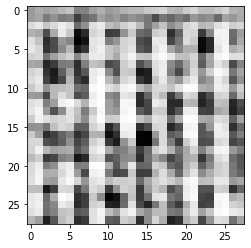

In [67]:
encoded_imgs = np.random.rand(1,7,7,8)
decoded_imgs = decoder.predict(encoded_imgs)

plt.imshow(decoded_imgs.reshape(28, 28))

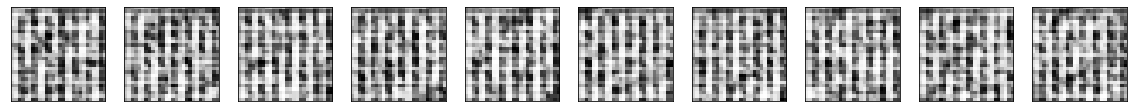

In [68]:
encoded_imgs = np.random.rand(10,7,7,8)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # generation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()